## REI602M Machine Learning - Homework 3
### Due: Sunday 7.1.2021

**Objectives**: Classification, support vector machines, text classification

**Name**: Alexander Guðmundsson, **email: ** alg35@hi.is, **collaborators:** (if any)

Please provide your solutions by filling in the appropriate cells in this notebook, creating new cells as needed. Hand in your solution on Gradescope. Make sure that you are familiar with the course rules on collaboration (encouraged) and copying (very, very, bad).

1) [Spam filtering, 30 points - This is based on a problem from Andrew Ng's CS229 machine learning course at Stanford]
In recent years, spam on electronic newsgroups has been an increasing problem. Here, you will
build a classifier to distinguish between "real" newsgroup messages, and spam messages.
For this experiment, a set of spam emails and a set of genuine newsgroup messages have been obtained.
Using only the subject line and body of each message, we’ll learn to distinguish
between the spam and non-spam.
All the files for the problem are in the file `email_spam.zip`.
In order to get the text emails into a form usable by a off-the shelf classifier, some preprocessing on the
messages has already been performed. You can look at two sample spam emails in the files `spam_sample_original`,
and their preprocessed forms in the files `spam_sample_preprocessed*`. The first line in
the preprocessed format is just the label and is not part of the message. The preprocessing
ensures that only the message body and subject remain in the dataset; email addresses
(EMAILADDR), web addresses (HTTPADDR), currency (DOLLAR) and numbers (NUMBER)
were also replaced by the special tokens to allow them to be considered properly in the
classification process. (In this problem, we’ll going to call the features "tokens" rather than
"words," since some of the features will correspond to special values like EMAILADDR.
You don’t have to worry about the distinction.) The files `news_sample original` and
`news_sample_preprocessed` also give an example of a non-spam mail.

The work to extract feature vectors (i.e. classifier inputs) out of the documents has also been done for you, so you
can just load in the design matrices (called document-word matrices in text classification)
containing all the data. In a document-word matrix, the $i$-th row represents the $i$-th document/email,
and the $j$-th column represents the $j$-th distinct token. Thus, the $(i,j)$-entry of
this matrix represents the number of occurrences of the $j$-th token in the $i$-th document.

For this problem, we’ve chosen as our set of tokens considered (that is, as our vocabulary)
only the medium frequency tokens. The intuition is that tokens that occur too often or
too rarely do not have much classification value. (Examples tokens that occur very often
are words like "the", "and", and "of", which occur in so many emails and are sufficiently
content-free that they aren’t worth modeling.) Also, words were stemmed using a standard
stemming algorithm; basically, this means that “price,” “prices” and “priced” have all been
replaced with “price,” so that they can be treated as the same word. For a list of the tokens
used, see the variable file `tokenlist`.
Since the document-word matrix is extremely sparse (has lots of zero entries), we have
stored it in our own efficient format to save space. You don’t have to worry about this
format. The file `read_spam_data.py` provides the function `read_matrix` to read in the document-word
matrix and labels.

Train a linear SVM on this dataset using the implementation in scikit-learn, `sklearn.svm.LinearSVC`
with parameter $C=0.1$. Evaluate the accuracy on the test set for training sets of size 50, 100,
200, 400, 800 and 1400 and for the full test set as well. What conclusions can you draw from the results?

*Comments*:

1) To read the training and test data and the list of tokens behind the features use
```python
    trainMatrix, tokenlist, trainCategory = readMatrix('MATRIX.TRAIN')
    testMatrix, tokenlist, testCategory = readMatrix('MATRIX.TEST')```

2) To use the `sklearn.svm.LinearSVC` class, you start by calling the `fit` function which solves the SVM optimization problem for the given training set. You then either call `predict` to get predictions for the test set (or other data points) and subsequently evaluate the error rate/accuracy for the classifier "manually"; or you call the `score` function which performs the two operations (prediction and evaluation) in one go. This is completely analogous to how all the classifiers are used in scikit-learn. The Jupyter workbook vika02_logreg.ipynb shows how this is done with the logistic regression classifier.

/home/alli959/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alli959/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alli959/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alli959/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/home/alli959/.local/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iteratio

ValueError: At least one argument from "cellColours" or "cellText" must be provided to create a table.

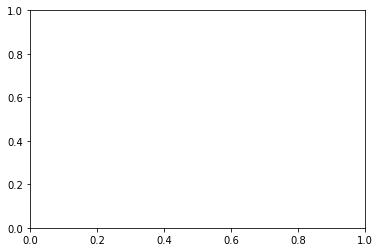

In [71]:
import numpy as np
import os
from sklearn.svm import LinearSVC as SVC
import matplotlib.pyplot as plt

def data_subsample(X, y, n):
    # Select a random subset of the training data
    perm = np.random.permutation(len(y))
    X_sub=X[perm[0:n],:]
    y_sub=y[perm[0:n]]
    return X_sub, y_sub




import sys
sys.path.append("./email_spam")

from read_spam_data import read_matrix



#insert Data
train_Matrix, tokenlist, trainCategory = read_matrix('./email_spam/MATRIX.TRAIN')
test_Matrix, tokenlist, testCategory = read_matrix('./email_spam/MATRIX.TEST')

#TestCount
ntests = np.array([50,100,200,400,800,1400, len(train_Matrix)])
fitter = SVC(C = 0.1)
scores = [] # [trainsize, testsize, score]

#create an array of scores by sample size
for trainsize in ntests:
    for testsize in ntests:
        #finding subsamples
        sub_train_Matrix, sub_trainCategory = data_subsample(train_Matrix, trainCategory, trainsize)
        sub_test_Matrix, sub_testCategory = data_subsample(test_Matrix, testCategory, testsize)
        
        #adding the sub_training data to linearSVC
        fitter.fit(sub_train_Matrix, sub_trainCategory)
        #getting score from sub_test data
        score = fitter.score(sub_test_Matrix, sub_testCategory)
        temp = [trainsize, testsize, score]
        scores.append(temp)
scores = np.array(scores)

#create a table
colLabels = ["trainSize", "accuracy"]
rowLabels = ["testSize", "accuracy"]
plt.table(rowLabels = rowLabels, colLabels = colLabels)



2) [Tweet sentiment, 30 points] Many organizations are interested in analyzing whether given text segments such as news stories and tweets convey positive or negative feeling. In some cases, negative tweets can do significant to company reputation and they are forcde to respond. A system that can automatically analyze text for sentiment is therefore of value. Your task here is to classify tweets sentiment into one of the following categories positive, neutral or negative.

In this exercise you see how raw text containing "tweet extracts" can be converted to feature vectors similar to those that were provided with problem 1). The pandas package is used to read the data from file (`np.genfromtxt` is cumbersome to use here) and scikit-learn used to convert text to features.

a) [20 points] Create a random train/test split using `sklearn.model_selection.train_test_split` and then train a logistic regression classifier on the data using scikit-learn. Use the `multi_class='ovr'` switch to use the one-against-all strategy to handle K>2 classes and set the regularization parameter $C$ to 0.1 to avoid numerical problems during the optimization.

Report the accuracy of your classifier, provide a confusion matrix and comment briefly on the results.

*Comments:*

1) The data used in this exercise comes from a Machine learning competition on Kaggle. For more details, see here: https://www.kaggle.com/c/tweet-sentiment-extraction You can examine the raw data in e.g. a text editor or Excel (always an important step!)

2) The `CountVectorizer` class counts the occurence of each word in a segment of text. It does some filtering behind the scenes to remove extremely rare words as well as the most frequent ones. See the documentation for more details. You are free to experiment with the settings if you want.

3) The `LabelEncoder` class is used to convert text labels to integers, e.g. "positive", "neutral" and "negative" to 1, 0, -1 which are then used as inputs to a classifier.

In [31]:
# Read sentiment data from text files and convert to vector-based features
import numpy as np
import pandas as pd
from IPython.display import display
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer

# The text files are somewhat messy, clean-up is probably a good idea
df = pd.read_csv('sentiment_train.csv')
display(df.head())

# Encode tweets using bag-of-words representation
vectorizer = CountVectorizer(min_df=5, max_df=0.95)
X = vectorizer.fit_transform(df['text'].apply(lambda x: np.str_(x)))

# Mapping used to identify original text from feature IDs
inv_map = {v: k for k, v in vectorizer.vocabulary_.items()}

# Encode "positive", neutral" and "negative" labels as integers
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])

# It is important to check for class imbalance
print("X: ", X.shape) # Sanity check
for i in range(3):
    print("Class {} ({}), count={}".format(i, le.classes_[i], np.sum(y == i)))

ModuleNotFoundError: No module named 'pandas'

In [ ]:
# Insert code here
...

b) [Feature importance, 10 points] In feature selection (a.k.a. input variable selection) the goal is to identify which features are most relevant for a given classification task. By performing a careful selection of features, the performance of a classifier can often be improved significantly, in particular when data is limited. Alternatively, it can be interesting to identify a minimal set of features for acceptable performance (e.g. due to high costs of collecting/measuring the full set of features). Examining the features most relevant to the classification can also provide valuable insights into the data.

A simple feature selection strategy uses the size of the weights in a linear classifier as measures of feature importance. The larger $\theta_k$  is, the larger the role of the corresponding feature in the decision function. The strategy is therefore to rank the features according to $\theta_k$.

The weights are stored in the `coef_` attribute in the LogisticRegression class. This is a n_classes x n_features matrix. For each of the classes, obtain the names of the 10 highest ranking features (in terms of $\theta$'s). Comment briefly on the results (you need to consider how the multi-class setting is treated in this case).

In [ ]:
# Insert code here
# ...

3) [Stochastic gradient descent for SVM, 40 points]. In this problem you are to implement a stochastic gradient descent algorithm for training a linear SVM. The model is $f_\theta(x)=\theta^T x$ (to include an intercept term you can simply set $x_0=1$ as before). The algorithm minimizes the SVM objective function
$$
   J(\theta) = \frac{\lambda}{2}\theta^T \theta + \frac{1}{n} \sum_{i=1}^n \max(0, 1-y^{(i)}\theta^T x^{(i)}).
$$
The hinge loss $\max(0, 1-z)$ is not differentiable at $z=1$ and this results in an objective function which is not differentiable everywhere, hence the gradient of $J(\theta)$ is not defined everywhere. To deal with this, the SGD algorithm uses the *sub-gradient* of $J$ instead (see below). The algorithm starts from $\theta^{(0)}=0$ and performs a fixed number of iterations. Step $k$ of the algorithm is as follows:

Select $i$ uniformly at random from $[1,n]$

$\alpha^{(k)} = \frac{1}{\lambda k}$

if $y^{(i)}~(\theta^{(k)})^T x^{(i)} < 1 ~\textrm{then}$

$\quad \theta^{(k+1)} = \theta^{(k)} - \alpha^{(k)}(\lambda \theta^{(k)} - y^{(i)} x^{(i)})$

else

$\quad \theta^{(k+1)} = \theta^{(k)} - \alpha^{(k)} \lambda \theta^{(k)}$

where $\theta^{(k)}$ denotes the parameter *vector* in iteration $k$ and $\lambda>0$ is a regularization hyper-parameter. The step size $\alpha^{(k)}$ decays over the course of iterations (instead to being constant as we've seen previously). This helps to avoid overshooting the minimum.

a) [30 points] Implement the SGD algorithm above. Train an SVM using your algorithm on the data in `synth_train.txt` with $\lambda=1/100$. Create a scatter plot of the training data (it is a 2D toy data set) and show the decision boundary of the classifier (see Jupyter workbook vika02_logreg). Report the model coefficients and the test set error (fraction of incorrectly classified examples) using the data in `synth_test.txt`

*Comments*:

1) To sample uniformly at random from $[0,n-1]$ use `np.random.randint`.

2) Use `np.genfromtxt` to read the data.

3). A *sub-gradient* is a generalization of the gradient for convex functions which are not necessarily differentiable. Such functions arise quite frequently in machine learning, e.g. when the 1-norm is used for regularization. The sub-gradient of a function at a point is the slope of *a* hyperplane that passes through the point and lies below the graph of the function.

In [ ]:
def svm_sgd(X, y, lambda_par, max_epochs=10):
    # Inputs:
    #   X ... Input variables (n x p matrix)
    #   y ... Labels (n vector), -1 or 1
    #   lambda_par ... Regularization constant (non-negative)
    #   max_epochs ... Maximum number of passes through the data set
    #
    # Output:
    #   Model coefficients (n vector)

    assert(lambda_par > 0)
    max_iter = max_epochs*X.shape[0]

    # Insert code here
    # ...
    return theta

b) [10 points] Modify the code in a) so that it keeps track of the objective function value during the course of the iterations. Plot the objective function values as a function of iteration number. This is similar to what you did in homework 2 (but with a different objective function).

*Comments*:

1) Computing the function values and training set error requires a pass through all the training data. This is computationally expensive, so you should compute these values once every $T$ iterations where $T$ could e.g. be 100, 1000 or $n$.

2) To speed up the computations, use matrix and vector operations instead of *for*-loops where possible. For example, if the training set is in matrix $X$ you can classify all the examples in a single matrix-vector multiplication, $y_{pred}=X\theta$ (why?) This issue is discussed in some detail in http://cs229.stanford.edu/section/vec_demo/Vectorization_Section.pdf
  
3) Note that the $\lambda$ parameter in the above SVM formulation is related to the $C$ parameter in the "standard" SVM formulation via $\lambda=1/(nC)$.